In [1]:
### Imports ###
from nntomo.network import nnfbp_training, get_MSE_evolution, msdnet_training
from nntomo.nnfbp import DatasetNNFBP
from nntomo.msdnet import DatasetMSDNET
from nntomo.projection_stack import ProjectionStack
from nntomo.utilities import get_MSE_loss, empty_cached_gpu_memory
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

### Training dataset

For the training dataset, simulated STEM projections fo different MOF structures are taken for the inputs and the SIRT reconstruction with 72 projections is used for the real output values. The selected MOF structures are: MOF-5, PCN-61, IRMOF-76, ZIF-4 and MOF-1131.

In [3]:
training_mofs = ['MOF-5', 'PCN-61', 'IRMOF-76', 'ZIF-4', 'MOF-1131']
cell_repetitions = [3, 2, 2, 5, 3] # Chosen so that the number of voxels around the first axis is roughly the same
symetries = [True, True, True, False, False]

training_stacks = []

for mof, cell_repetition, symetry in zip(training_mofs, cell_repetitions, symetries):
    cif_file = f"data/cif_files/{mof}.cif"
    projections = ProjectionStack.from_cif_file(cif_file, 144, 'full', cell_repetition=(cell_repetition,1,1), del_hydrogen=True, symetry=symetry)
    projections = projections.get_resized_proj(512)
    projections.save()
    training_stacks.append(projections)

c:\Users\Admin-tomo\anaconda3\envs\abtem_env\Lib\site-packages\ase\io\cif.py:408: UserWarning: crystal system 'cubic' is not interpreted for space group Spacegroup(225, setting=1). This may result in wrong setting!
  warnings.warn(


tif file retrieved for projection angle -90.0°
tif file retrieved for projection angle -88.75°
tif file retrieved for projection angle -87.5°
tif file retrieved for projection angle -86.25°
tif file retrieved for projection angle -85.0°
tif file retrieved for projection angle -83.75°
tif file retrieved for projection angle -82.5°
tif file retrieved for projection angle -81.25°
tif file retrieved for projection angle -80.0°
tif file retrieved for projection angle -78.75°
tif file retrieved for projection angle -77.5°
tif file retrieved for projection angle -76.25°
tif file retrieved for projection angle -75.0°
tif file retrieved for projection angle -73.75°
tif file retrieved for projection angle -72.5°
tif file retrieved for projection angle -71.25°
tif file retrieved for projection angle -70.0°
tif file retrieved for projection angle -68.75°
tif file retrieved for projection angle -67.5°
tif file retrieved for projection angle -66.25°
tif file retrieved for projection angle -65.0°
tif

c:\Users\Admin-tomo\anaconda3\envs\abtem_env\Lib\site-packages\ase\io\cif.py:408: UserWarning: crystal system 'Cubic' is not interpreted for space group Spacegroup(225, setting=1). This may result in wrong setting!
  warnings.warn(


tif file retrieved for projection angle -90.0°
tif file retrieved for projection angle -88.75°
tif file retrieved for projection angle -87.5°
tif file retrieved for projection angle -86.25°
tif file retrieved for projection angle -85.0°
tif file retrieved for projection angle -83.75°
tif file retrieved for projection angle -82.5°
tif file retrieved for projection angle -81.25°
tif file retrieved for projection angle -80.0°
tif file retrieved for projection angle -78.75°
tif file retrieved for projection angle -77.5°
tif file retrieved for projection angle -76.25°
tif file retrieved for projection angle -75.0°
tif file retrieved for projection angle -73.75°
tif file retrieved for projection angle -72.5°
tif file retrieved for projection angle -71.25°
tif file retrieved for projection angle -70.0°
tif file retrieved for projection angle -68.75°
tif file retrieved for projection angle -67.5°
tif file retrieved for projection angle -66.25°
tif file retrieved for projection angle -65.0°
tif

c:\Users\Admin-tomo\anaconda3\envs\abtem_env\Lib\site-packages\ase\io\cif.py:408: UserWarning: crystal system 'Orthorhombic' is not interpreted for space group Spacegroup(61, setting=1). This may result in wrong setting!
  warnings.warn(


tif file retrieved for projection angle -66.25°
tif file retrieved for projection angle -65.0°
tif file retrieved for projection angle -63.75°
tif file retrieved for projection angle -62.5°
tif file retrieved for projection angle -61.25°
tif file retrieved for projection angle -60.0°
tif file retrieved for projection angle -58.75°
tif file retrieved for projection angle -57.5°
tif file retrieved for projection angle -56.25°
tif file retrieved for projection angle -55.0°
tif file retrieved for projection angle -53.75°
tif file retrieved for projection angle -52.5°
tif file retrieved for projection angle -51.25°
tif file retrieved for projection angle -50.0°
tif file retrieved for projection angle -48.75°
tif file retrieved for projection angle -47.5°
tif file retrieved for projection angle -46.25°
tif file retrieved for projection angle -45.0°
tif file retrieved for projection angle -43.75°
tif file retrieved for projection angle -42.5°
tif file retrieved for projection angle -41.25°
ti

c:\Users\Admin-tomo\anaconda3\envs\abtem_env\Lib\site-packages\ase\io\cif.py:408: UserWarning: crystal system 'monoclinic' is not interpreted for space group Spacegroup(14, setting=1). This may result in wrong setting!
  warnings.warn(


tif file retrieved for projection angle -90.0°
tif file retrieved for projection angle -88.75°
tif file retrieved for projection angle -87.5°
tif file retrieved for projection angle -86.25°
tif file retrieved for projection angle -85.0°
tif file retrieved for projection angle -83.75°
tif file retrieved for projection angle -82.5°
tif file retrieved for projection angle -81.25°
tif file retrieved for projection angle -80.0°
tif file retrieved for projection angle -78.75°
tif file retrieved for projection angle -77.5°
tif file retrieved for projection angle -76.25°
tif file retrieved for projection angle -75.0°
tif file retrieved for projection angle -73.75°
tif file retrieved for projection angle -72.5°
tif file retrieved for projection angle -71.25°
tif file retrieved for projection angle -70.0°
tif file retrieved for projection angle -68.75°
tif file retrieved for projection angle -67.5°
tif file retrieved for projection angle -66.25°
tif file retrieved for projection angle -65.0°
tif

In [4]:
# SIRT reconstructions

training_reconstructions = []
for stack in training_stacks:
    sirt_rec = stack.get_SIRT_reconstruction(n_iter = 150)
    training_reconstructions.append(sirt_rec)
    sirt_rec.save()

Saving volume...
File saved at c:\Users\Admin-tomo\Documents\tomo-reconstruction-alix\github_repository\nn-tomo-reconstruction\scripts\data\volume_files\sirt150_MOF-5-311-144proj-resized512.mrc.
 ID: sirt150_MOF-5-311-144proj-resized512
Saving volume...
File saved at c:\Users\Admin-tomo\Documents\tomo-reconstruction-alix\github_repository\nn-tomo-reconstruction\scripts\data\volume_files\sirt150_PCN-61-211-144proj-resized512.mrc.
 ID: sirt150_PCN-61-211-144proj-resized512
Saving volume...
File saved at c:\Users\Admin-tomo\Documents\tomo-reconstruction-alix\github_repository\nn-tomo-reconstruction\scripts\data\volume_files\sirt150_IRMOF-76-211-144proj-resized512.mrc.
 ID: sirt150_IRMOF-76-211-144proj-resized512
Saving volume...
File saved at c:\Users\Admin-tomo\Documents\tomo-reconstruction-alix\github_repository\nn-tomo-reconstruction\scripts\data\volume_files\sirt150_ZIF-4-511-144proj-resized512.mrc.
 ID: sirt150_ZIF-4-511-144proj-resized512
Saving volume...
File saved at c:\Users\Admi

### Validation Dataset: UiO-66

In [27]:
### Structure for NN training - MOF: projections ###

validation_mofs = ['UiO-66', 'MIL-53']#, 'MOF-1115']
cell_repetitions = [4, 5]#, 2] # Chosen so that the number of voxels around the first axis is roughly the same
symetries = [True, False]#, False]

validation_stacks = []

for mof, cell_repetition, symetry in zip(validation_mofs, cell_repetitions, symetries):
    cif_file = f"data/cif_files/{mof}.cif"
    projections = ProjectionStack.from_cif_file(cif_file, 144, 'full', cell_repetition=(cell_repetition,1,1), del_hydrogen=True, symetry=symetry)
    projections = projections.get_resized_proj(512)
    projections.save()
    validation_stacks.append(projections)

c:\Users\Admin-tomo\anaconda3\envs\abtem_env\Lib\site-packages\ase\io\cif.py:408: UserWarning: crystal system 'cubic' is not interpreted for space group Spacegroup(225, setting=1). This may result in wrong setting!
  warnings.warn(


tif file retrieved for projection angle -90.0°
tif file retrieved for projection angle -88.75°
tif file retrieved for projection angle -87.5°
tif file retrieved for projection angle -86.25°
tif file retrieved for projection angle -85.0°
tif file retrieved for projection angle -83.75°
tif file retrieved for projection angle -82.5°
tif file retrieved for projection angle -81.25°
tif file retrieved for projection angle -80.0°
tif file retrieved for projection angle -78.75°
tif file retrieved for projection angle -77.5°
tif file retrieved for projection angle -76.25°
tif file retrieved for projection angle -75.0°
tif file retrieved for projection angle -73.75°
tif file retrieved for projection angle -72.5°
tif file retrieved for projection angle -71.25°
tif file retrieved for projection angle -70.0°
tif file retrieved for projection angle -68.75°
tif file retrieved for projection angle -67.5°
tif file retrieved for projection angle -66.25°
tif file retrieved for projection angle -65.0°
tif

c:\Users\Admin-tomo\anaconda3\envs\abtem_env\Lib\site-packages\ase\io\cif.py:408: UserWarning: crystal system '?' is not interpreted for space group Spacegroup(62, setting=1). This may result in wrong setting!
  warnings.warn(


tif file retrieved for projection angle -26.25°
tif file retrieved for projection angle -25.0°
tif file retrieved for projection angle -23.75°
tif file retrieved for projection angle -22.5°
tif file retrieved for projection angle -21.25°
tif file retrieved for projection angle -20.0°
tif file retrieved for projection angle -18.75°
tif file retrieved for projection angle -17.5°
tif file retrieved for projection angle -16.25°
tif file retrieved for projection angle -15.0°
tif file retrieved for projection angle -13.75°
tif file retrieved for projection angle -12.5°
tif file retrieved for projection angle -11.25°
tif file retrieved for projection angle -10.0°
tif file retrieved for projection angle -8.75°
tif file retrieved for projection angle -7.5°
tif file retrieved for projection angle -6.25°
tif file retrieved for projection angle -5.0°
tif file retrieved for projection angle -3.75°
tif file retrieved for projection angle -2.5°
tif file retrieved for projection angle -1.25°
tif file 

In [28]:
# SIRT reconstructions

validation_reconstructions = []
for stack in validation_stacks:
    sirt_rec = stack.get_SIRT_reconstruction(n_iter = 150)
    validation_reconstructions.append(sirt_rec)
    sirt_rec.save()

# Segmentations
#validation_reconstructions_segm = [rec.get_segmented_volume(threshold_sirt) for rec in validation_reconstructions]

Saving volume...
File saved at c:\Users\Admin-tomo\Documents\tomo-reconstruction-alix\github_repository\nn-tomo-reconstruction\scripts\data\volume_files\sirt150_UiO-66-411-144proj-resized512.mrc.
 ID: sirt150_UiO-66-411-144proj-resized512
Saving volume...
File saved at c:\Users\Admin-tomo\Documents\tomo-reconstruction-alix\github_repository\nn-tomo-reconstruction\scripts\data\volume_files\sirt150_MIL-53-511-144proj-resized512.mrc.
 ID: sirt150_MIL-53-511-144proj-resized512


### SCRIPT

In [7]:
# Stack to reconstruct
uio67_stack = ProjectionStack.from_cif_file("data/cif_files/UiO-67.cif", 144, 'full', cell_repetition=(3,3,1), del_hydrogen=True, symetry=True)
uio67_stack = uio67_stack.get_resized_proj(512)
uio67_stack.save()

tif file retrieved for projection angle -90.0°
tif file retrieved for projection angle -88.75°
tif file retrieved for projection angle -87.5°
tif file retrieved for projection angle -86.25°
tif file retrieved for projection angle -85.0°
tif file retrieved for projection angle -83.75°
tif file retrieved for projection angle -82.5°
tif file retrieved for projection angle -81.25°
tif file retrieved for projection angle -80.0°
tif file retrieved for projection angle -78.75°
tif file retrieved for projection angle -77.5°
tif file retrieved for projection angle -76.25°
tif file retrieved for projection angle -75.0°
tif file retrieved for projection angle -73.75°
tif file retrieved for projection angle -72.5°
tif file retrieved for projection angle -71.25°
tif file retrieved for projection angle -70.0°
tif file retrieved for projection angle -68.75°
tif file retrieved for projection angle -67.5°
tif file retrieved for projection angle -66.25°
tif file retrieved for projection angle -65.0°
tif

In [8]:
# Reference reconstruction (144 projs)
sirt144_reconstruction = uio67_stack.get_SIRT_reconstruction(150)
sirt144_reconstruction.save()

Saving volume...
File saved at c:\Users\Admin-tomo\Documents\tomo-reconstruction-alix\github_repository\nn-tomo-reconstruction\scripts\data\volume_files\sirt150_UiO-67-331-144proj-resized512.mrc.
 ID: sirt150_UiO-67-331-144proj-resized512


In [14]:
subsets = [144,72,48,36,24,18,16,12,9,8,6,4]

In [15]:
# Training of NNFBP networks
trained_networks_nnfbp = []

for subset in subsets:
    empty_cached_gpu_memory()
    # subsets
    training_stacks_sub = [stack.get_proj_subset(subset) for stack in training_stacks]
    validation_stack_sub = [stack.get_proj_subset(subset) for stack in validation_stacks]

    # training
    training_dataset = DatasetNNFBP(training_stacks_sub, training_reconstructions)
    validation_dataset = DatasetNNFBP(validation_stack_sub, validation_reconstructions)

    network = nnfbp_training(training_dataset, validation_dataset, 16)
    trained_networks_nnfbp.append(network)

Start of training.
Epoch 40 (n=24) | Best avg MSELoss(): 0.000037 |Last avg MSELoss(): 0.000050  
Start of training.
Epoch 57 (n=24) | Best avg MSELoss(): 0.000062 |Last avg MSELoss(): 0.000065  
Start of training.
Epoch 48 (n=24) | Best avg MSELoss(): 0.000065 |Last avg MSELoss(): 0.000079  
Start of training.
Epoch 42 (n=24) | Best avg MSELoss(): 0.000088 |Last avg MSELoss(): 0.000090  
Start of training.
Epoch 32 (n=24) | Best avg MSELoss(): 0.000124 |Last avg MSELoss(): 0.000143  
Start of training.
Epoch 57 (n=24) | Best avg MSELoss(): 0.000125 |Last avg MSELoss(): 0.000138  
Start of training.
Epoch 52 (n=24) | Best avg MSELoss(): 0.000121 |Last avg MSELoss(): 0.000127  
Start of training.
Epoch 74 (n=24) | Best avg MSELoss(): 0.000179 |Last avg MSELoss(): 0.000180  
Start of training.
Epoch 40 (n=24) | Best avg MSELoss(): 0.000182 |Last avg MSELoss(): 0.000198  


In [16]:
# MSE of NNFBP reconstructions

mse_nnfbp = []

for subset, network in zip(subsets, trained_networks_nnfbp):
    empty_cached_gpu_memory()
    uio67_stack_sub = uio67_stack.get_proj_subset(subset)

    nn_rec = uio67_stack_sub.get_NNFBP_reconstruction(network, show_progressbar=False)
    mse_nnfbp.append(get_MSE_loss(sirt144_reconstruction, nn_rec))

print(mse_nnfbp)

[8.520302799297497e-06, 1.2482574675232172e-05, 1.2447249901015311e-05, 2.094585397571791e-05, 2.1868527255719528e-05, 2.242036680399906e-05, 2.5492827262496576e-05, 3.590521009755321e-05, 3.9692840800853446e-05, 5.6399450841126963e-05, 8.603867900092155e-05, 7.593747432110831e-05]


In [29]:
# Training of MSDNET networks
trained_networks_msdnet = []

for subset in subsets:
    empty_cached_gpu_memory()
    # subsets
    training_stacks_sub = [stack.get_proj_subset(subset) for stack in training_stacks]
    validation_stack_sub = [stack.get_proj_subset(subset) for stack in validation_stacks]

    # training
    training_dataset = DatasetMSDNET(training_stacks_sub, training_reconstructions)
    validation_dataset = DatasetMSDNET(validation_stack_sub, validation_reconstructions)

    network = msdnet_training(training_dataset, validation_dataset, depth=80, batch_size=4, learning_rate=1e-3)
    trained_networks_msdnet.append(network)

Resume of training.


Looking for best number of iterations: [████████████████████████████████████████████████████████████] 50/50 Est wait 00:0.00



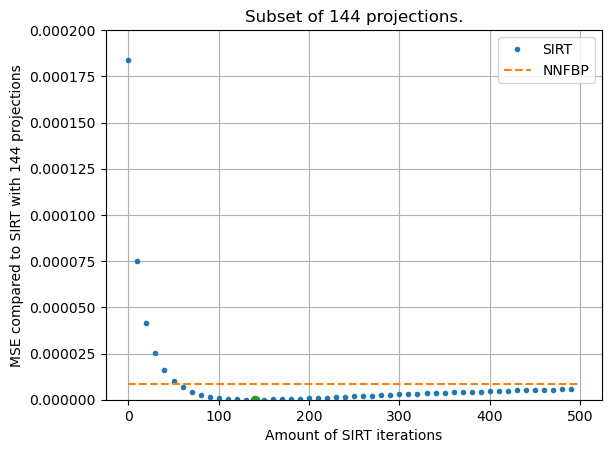

Looking for best number of iterations: [████████████████████████████████████████████████████████████] 50/50 Est wait 00:0.09



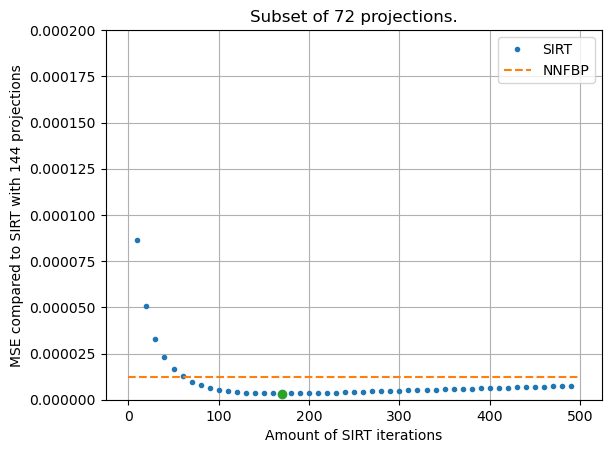

Looking for best number of iterations: [████████████████████████████████████████████████████████████] 50/50 Est wait 00:0.00



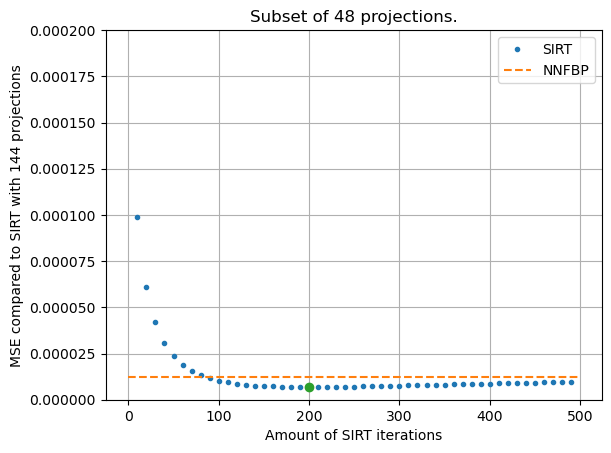

Looking for best number of iterations: [████████████████████████████████████████████████████████████] 50/50 Est wait 00:0.04



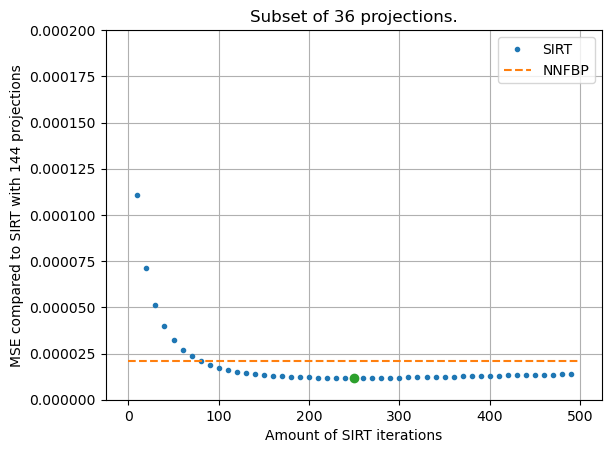

Looking for best number of iterations: [████████████████████████████████████████████████████████████] 50/50 Est wait 00:0.08



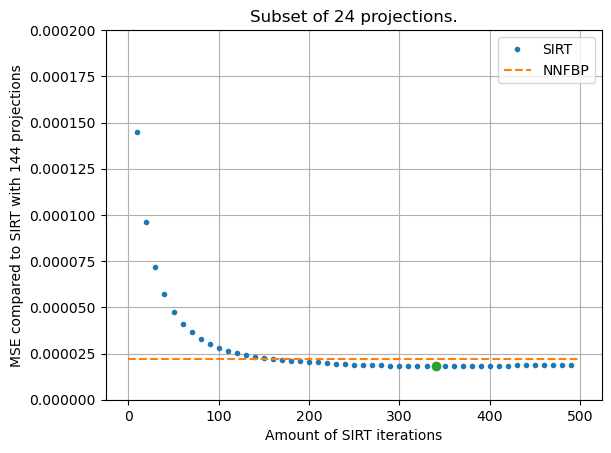

Looking for best number of iterations: [████████████████████████████████████████████████████████████] 50/50 Est wait 00:0.06



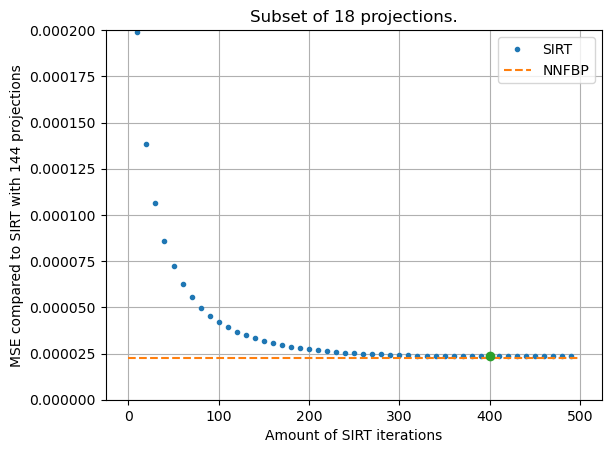

Looking for best number of iterations: [████████████████████████████████████████████████████████████] 50/50 Est wait 00:0.05



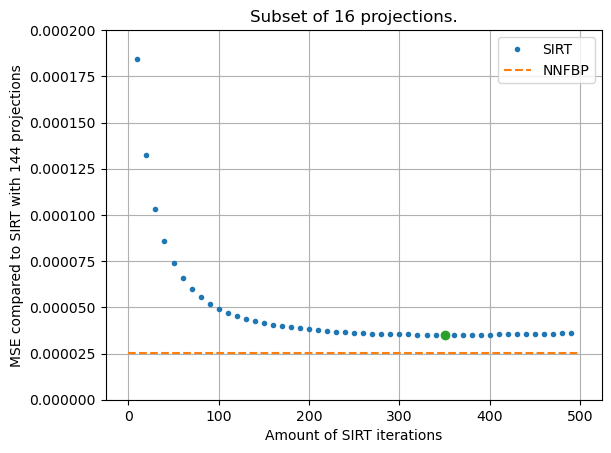

Looking for best number of iterations: [████████████████████████████████████████████████████████████] 50/50 Est wait 00:0.04



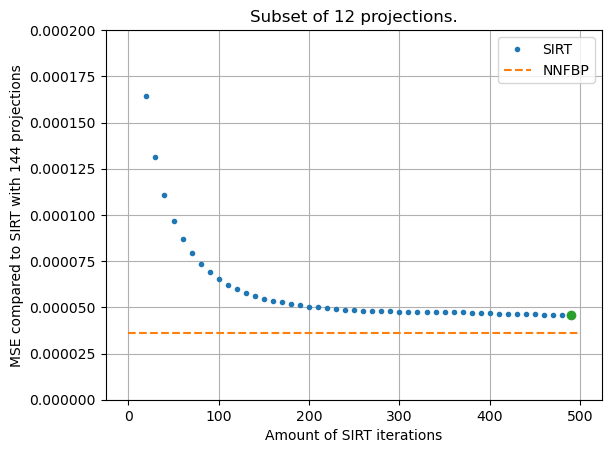

Looking for best number of iterations: [████████████████████████████████████████████████████████████] 50/50 Est wait 00:0.03



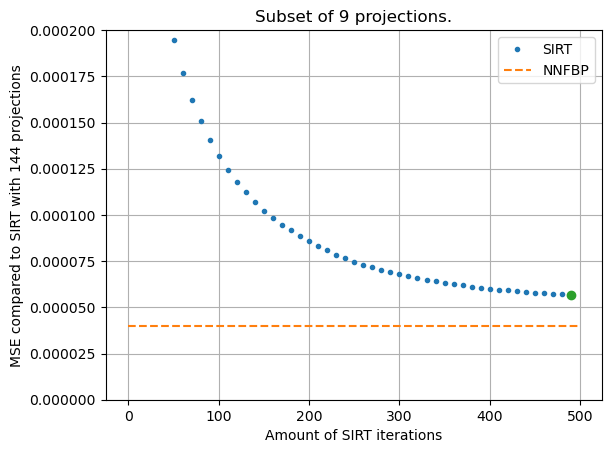

Looking for best number of iterations: [████████████████████████████████████████████████████████████] 50/50 Est wait 00:0.01



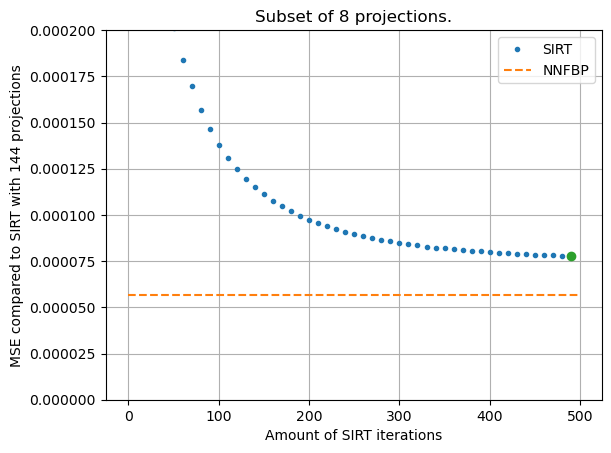

Looking for best number of iterations: [████████████████████████████████████████████████████████████] 50/50 Est wait 00:0.01



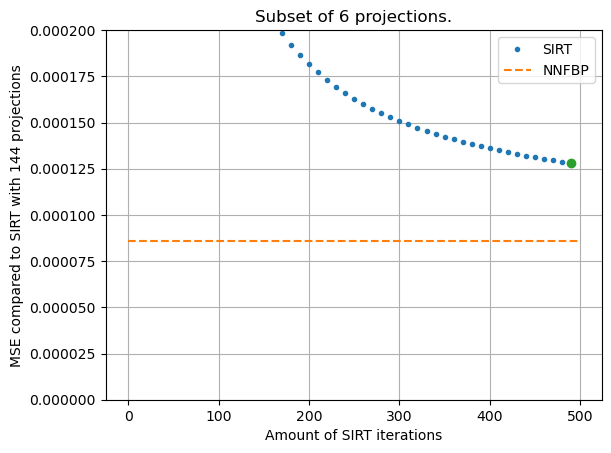

Looking for best number of iterations: [████████████████████████████████████████████████████████████] 50/50 Est wait 00:0.00



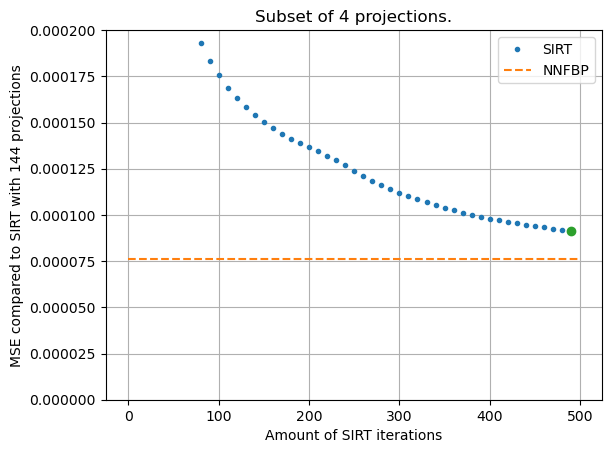

In [22]:
# MSE of SIRT + evolution with respect to the number of SIRT iterations

max_iter = 500
iter_step = 10

mse_sirt = []

for i, subset in enumerate(subsets):
    empty_cached_gpu_memory()

    uio67_stack_sub = uio67_stack.get_proj_subset(subset)

    # SIRT reconstruction with same threshold, with a number of iterations so that MSE is minimal compared to SIRT rec with 144 projections
    _, mse_list = uio67_stack_sub.get_SIRT_reconstruction(ref_rec=sirt144_reconstruction, segm_threshold=None, return_MSEs=True,
                                                          max_iter=max_iter, iter_step=iter_step) #sirt144_reconstruction_segm, threshold_sirt
    mse_sirt.append(min(mse_list))
    
    plt.plot(np.arange(0, max_iter, iter_step), mse_list, '.', label='SIRT')
    plt.plot(np.arange(max_iter), mse_nnfbp[i]*np.ones(max_iter), '--', label='NNFBP')
    #plt.plot(np.arange(max_iter), mse_msdnet[i]*np.ones(max_iter), '--', label='MSDNET')
    plt.plot(iter_step*np.argmin(mse_list), min(mse_list), 'o')
    plt.title(f"Subset of {subset} projections.")
    plt.grid()
    plt.legend()
    plt.xlabel("Amount of SIRT iterations")
    plt.ylabel("MSE compared to SIRT with 144 projections")#,\nsame threshold.")
    plt.ylim((0,0.0002))
    plt.show()

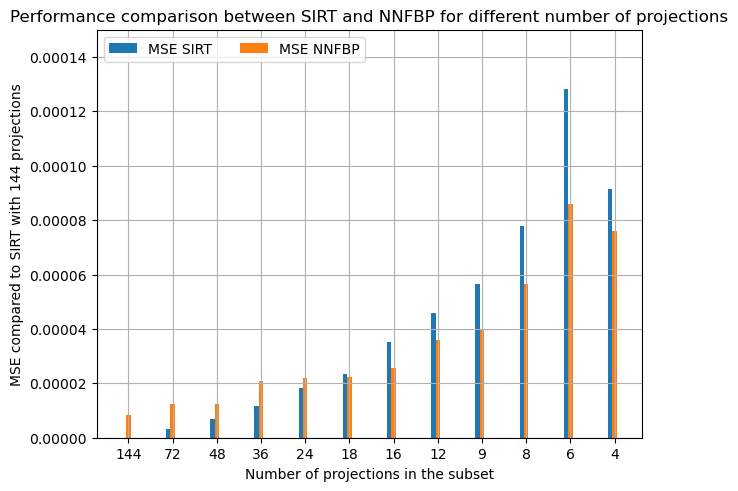

In [21]:
# MSE SIRT against MSE NNFBP


mse_lists = {
    'SIRT reconstruction': mse_sirt,
    'NNFBP reconstruction': mse_nnfbp,
#    'MSE MSDNET': mse_msdnet,
}

x = np.arange(len(subsets))  # the label locations
width = 0.1  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in mse_lists.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel("Number of projections in the subset")
ax.set_ylabel('MSE compared to SIRT with 144 projections')
ax.set_title('Performance comparison between SIRT and NNFBP for different number of projections')
ax.set_xticks(x + width, subsets)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 0.00015)
ax.grid()
plt.show()

MSE computations:[████████████████████████████████████████████████████████████] 67/67 Est wait 00:0.00




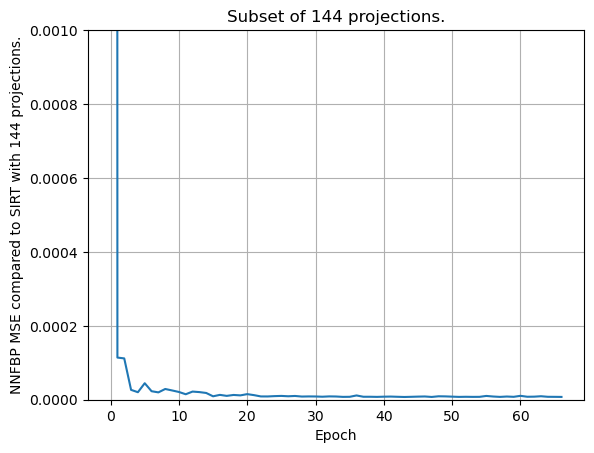

MSE computations:[████████████████████████████████████████████████████████████] 48/48 Est wait 00:0.01




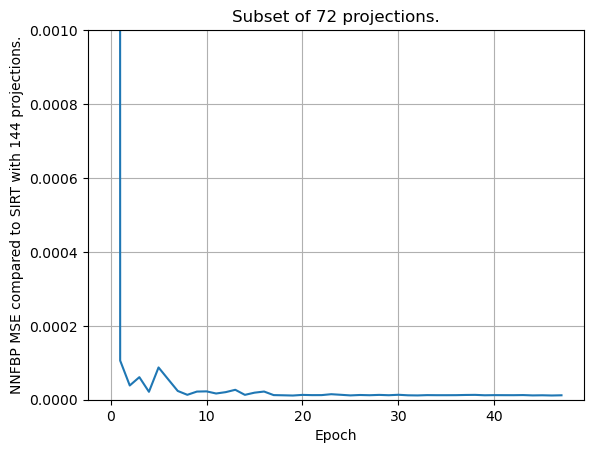

MSE computations:[████████████████████████████████████████████████████████████] 72/72 Est wait 00:0.06




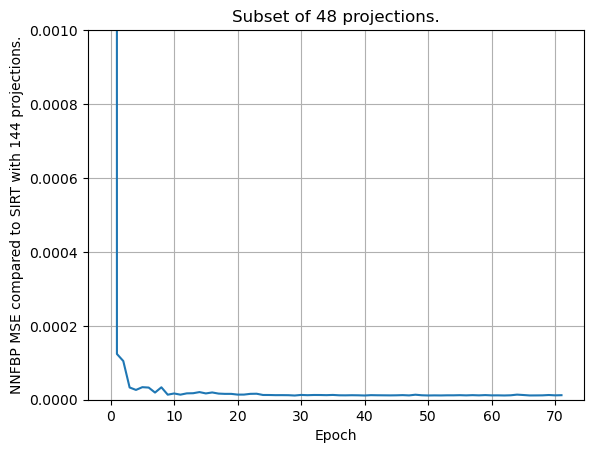

KeyboardInterrupt: 

In [23]:
for subset, network in zip(subsets, trained_networks_nnfbp):
    empty_cached_gpu_memory()
    # subsets

    uio67_stack_sub = uio67_stack.get_proj_subset(subset)

    mse_nn_evolution = get_MSE_evolution(network.id, uio67_stack_sub, sirt144_reconstruction, None)

    plt.plot(mse_nn_evolution)
    plt.grid()
    plt.title(f"Subset of {subset} projections.")
    plt.xlabel("Epoch")
    plt.ylabel("NNFBP MSE compared to SIRT with 144 projections.")
    plt.ylim((0,0.001))
    plt.show()